# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = ''

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


In [19]:
pd.value_counts(app_train['EXT_SOURCE_3'])

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
            ... 
0.028674       1
0.021951       1
0.879506       1
0.019468       1
0.023225       1
0.029079       1
0.849170       1
0.013948       1
0.872456       1
0.028275       1
0.020026       1
0.024919       1
0.844493       1
0.020311       1
0.026921       1
0.016541       1
0.864212       1
0.043227       1
0.021492       1
0.018266       1
0.016078       1
0.025272       1
0.020455       1
0.896010       1
0.029283       1
0.018137       1
0.017017       1
0.858178      

In [26]:
pd.value_counts(app_train['TARGET'])

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
app_train['EXT_SOURCE_3']

In [20]:
np.max(app_train['EXT_SOURCE_3'])

0.8960095494948396

In [21]:
np.min(app_train['EXT_SOURCE_3'])

0.0005272652387098817

## 練習時間
- 通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

- 列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

In [8]:
app_train_Cor = app_train.corr()['TARGET']

In [10]:
df_app_train_Cor = pd.DataFrame(app_train_Cor)

In [29]:
df_app_train_Cor = df_app_train_Cor.sort_values(by='TARGET')

In [31]:
df_app_train_Cor.head(15)

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,-0.078239
DAYS_EMPLOYED_ANOM,-0.045987
FLOORSMAX_AVG,-0.044003
FLOORSMAX_MEDI,-0.043768
FLOORSMAX_MODE,-0.043226
AMT_GOODS_PRICE,-0.039645
REGION_POPULATION_RELATIVE,-0.037227


In [53]:
df_app_train_Cor = df_app_train_Cor.drop(columns={"level_0"})

In [49]:
df_app_train_Cor = df_app_train_Cor.reset_index()

In [62]:
df_app_train_Cor = df_app_train_Cor.rename(columns={'index':'column'})

In [68]:
sub_df = df_app_train_Cor[df_app_train_Cor['TARGET']!= 1]

In [72]:
np.max(sub_df['TARGET'])

0.07495845742555217

- 相關係數最大15個

In [83]:
sub_df_Cor_Max15 = sub_df.tail(15) ;sub_df_Cor_Max15['column']

94                 FLAG_WORK_PHONE
95        DEF_60_CNT_SOCIAL_CIRCLE
96        DEF_30_CNT_SOCIAL_CIRCLE
97         LIVE_CITY_NOT_WORK_CITY
98                     OWN_CAR_AGE
99               DAYS_REGISTRATION
100                FLAG_DOCUMENT_3
101         REG_CITY_NOT_LIVE_CITY
102                 FLAG_EMP_PHONE
103         REG_CITY_NOT_WORK_CITY
104                DAYS_ID_PUBLISH
105         DAYS_LAST_PHONE_CHANGE
106           REGION_RATING_CLIENT
107    REGION_RATING_CLIENT_W_CITY
108                  DAYS_EMPLOYED
Name: column, dtype: object

- 相關係數最小15個

In [84]:
sub_df_Cor_Min15 = sub_df.head(15);sub_df_Cor_Min15['column']

0                   EXT_SOURCE_3
1                   EXT_SOURCE_2
2                   EXT_SOURCE_1
3                     DAYS_BIRTH
4             DAYS_EMPLOYED_ANOM
5                  FLOORSMAX_AVG
6                 FLOORSMAX_MEDI
7                 FLOORSMAX_MODE
8                AMT_GOODS_PRICE
9     REGION_POPULATION_RELATIVE
10                 ELEVATORS_AVG
11                ELEVATORS_MEDI
12                 FLOORSMIN_AVG
13                FLOORSMIN_MEDI
14                LIVINGAREA_AVG
Name: column, dtype: object

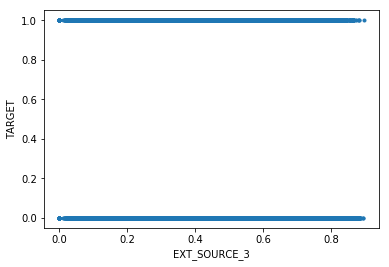

Correlation: nan


In [25]:
# 直接畫散布圖
plt.plot(app_train['EXT_SOURCE_3'],app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

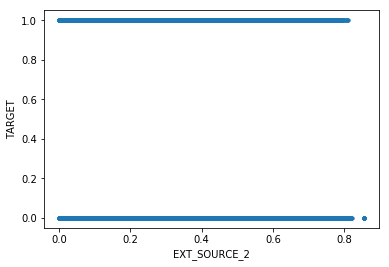

Correlation: nan


In [86]:
# 直接畫散布圖
plt.plot(app_train['EXT_SOURCE_2'],app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_2'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

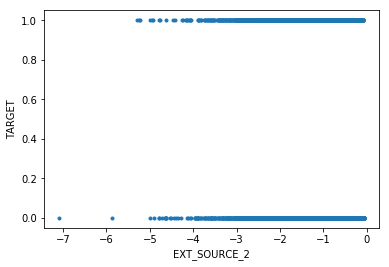

Correlation: nan


In [85]:
# 直接畫散布圖
plt.plot(np.log10(app_train['EXT_SOURCE_2']),app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_2'] , app_train['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))